# Gra w życie
## Mateusz Baran
### 155620

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from IPython import display
import asyncio
%matplotlib widget
%matplotlib inline

In [76]:
class GraWZycie:
    def __init__(self, n, m, iters, rules:str, only_result_plot=False):
        self.matrix = np.zeros((n, m))
        self.iters = iters
        self.point_to_born = []
        self.point_to_die = []
        self.only_result_plot = only_result_plot
        self.rules_str = rules
        self.rules_born, self.rules_die = self.translate_rules()
        
    
    def translate_rules(self):
        split_rules_str = self.rules_str.split('/')
        rules_to_born = [int(c) for c in split_rules_str[1]]
        rules_to_die = [int(c) for c in split_rules_str[0]]
        return rules_to_born, rules_to_die
    
    def draw_matrix(self):
        plt.figure(figsize=(15,15))
        plt.matshow(self.matrix, cmap='Blues', fignum=1)
        plt.show()
        
    def load_points(self, points_x:list, points_y:list):
        if len(points_x) != len(points_y):
            raise Exception('Lists are not eaqual!')
        for i in range(len(points_x)):
            self.matrix[points_y[i]][points_x[i]] = 1
            
    def load_file(self, file):
        """Ładuje plik z danymi."""
        
        lista = []
        with open(file, 'r') as file:
            for line in file:
                lista.append(list(map(lambda e: float(e), line.replace('\n', '').split())))
        for i in range(len(lista)):
            self.matrix[int(lista[i][1])][int(lista[i][0])] = 1
            
    
    def check_born_or_die(self, i, j):
        count = 0
        
        start_loop_i = i - 1
        start_loop_j = j - 1
        end_loop_i = i + 1
        end_loop_j = j + 1
        
        if start_loop_i < 0:
            start_loop_i += 1
        if start_loop_j < 0:
            start_loop_j += 1
        if end_loop_i >= self.matrix.shape[0]:
            end_loop_i -= 1
        if end_loop_j >= self.matrix.shape[1]:
            end_loop_j -= 1
        
        
        for i_p in range(start_loop_i, end_loop_i+1):
            for j_p in range(start_loop_j, end_loop_j+1):
                if i_p == i and j_p == j:
                    pass
                else:
                    if self.matrix[i_p][j_p] == 1:
                        count += 1
                    
        # -------
        
        if self.matrix[i][j] == 0: # born
            if count in self.rules_born:
                self.point_to_born.append([i,j])
        if self.matrix[i][j] == 1: # die
            if count not in self.rules_die:
                self.point_to_die.append([i,j])
        
    
    def born_or_kill(self):
        for born in self.point_to_born:
            self.matrix[born[0]][born[1]] = 1
        for kill in self.point_to_die:
            self.matrix[kill[0]][kill[1]] = 0
                
        self.point_to_born = []
        self.point_to_die = []
                
        
    def core(self):
        for l in range(self.iters):
            for i in range(len(self.matrix)):
                for j in range(len(self.matrix)):
                    self.check_born_or_die(i, j)
                                 
            self.born_or_kill()
            
            if not self.only_result_plot:
                plt.figure(figsize=(10,10))
                plt.matshow(self.matrix, cmap='Greys', fignum=1)
                
                plt.title(f'Generation {l+1}, people: {np.count_nonzero(self.matrix)}')
                clear_output(wait=True)
                plt.show()
            else:
                print(f'Generacja {l+1}',end='\r')
        if self.only_result_plot:
            plt.figure(figsize=(10,10))
            plt.matshow(self.matrix, cmap='Greys', fignum=1)
        
            plt.title(f'Generation {self.iters}, people: {np.count_nonzero(self.matrix)}')
            plt.show()
        
            

In [77]:
# gra_w_zycie = GraWZycie(n=200, m=200, iters=1000, rules='23/3')
# gra_w_zycie.load_points(points_x=[100, 100, 101, 100, 99], points_y=[100, 99, 99, 101, 100])
# gra_w_zycie.core()

In [78]:
dzialo_gospera = GraWZycie(n=200, m=200, iters=1000, rules='23/3')
dzialo_gospera.load_file('data.dat')
dzialo_gospera.core()

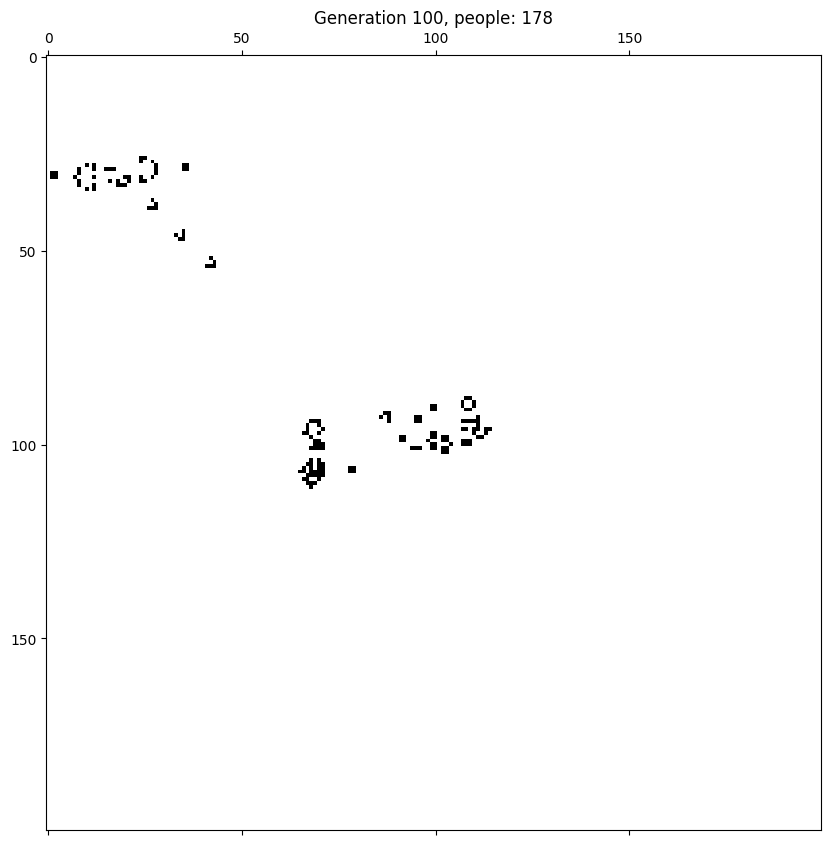